In [1360]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("parisrohan/credit-score-classification")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\bassam\.cache\kagglehub\datasets\parisrohan\credit-score-classification\versions\1


In [1361]:
import pandas as pd
import numpy as np
import os

pd.set_option("display.max_columns", None)
df = pd.read_csv(os.path.join(path, "train.csv"), low_memory=False)
df.sample(5)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
7816,0x43ce,CUS_0x43c5,January,Jonathan Gouldk,16,#F%$D@*&8,Architect,63149.2_,5121.433333,7,10,19,6,"Payday Loan, Personal Loan, Auto Loan, Not Spe...",20,16,27.02,7.0,Bad,3656.46,34.456617,6 Years and 2 Months,Yes,233.602177,119.26148243855526,!@9#%8,419.2796740875222,Standard
22672,0x9ada,CUS_0x5ca1,January,Ayesha Rascoev,35,678-30-7197,Engineer,34323.26,NaN,1,4,9,3,"Student Loan, Auto Loan, and Not Specified",2,2,9.94,3.0,_,358.47,24.579180,24 Years and 8 Months,No,63.302126,231.1975188627389,Low_spent_Medium_value_payments,258.92752169677544,Good
16439,0x7651,CUS_0x210f,August,Farahf,36,522-83-5666,Scientist,24376.2,2278.350000,4,7,10,1,Personal Loan,6,16,7.300000000000002,1.0,Standard,1109.03,33.348608,22 Years and 0 Months,Yes,10.835929,197.0518503085836,Low_spent_Small_value_payments,309.947220816707,Standard
52044,0x146f2,CUS_0x81ae,May,Deepa Seetharamany,18,437-30-2794,Accountant,61281.60000000001,5208.800000,7,7,11,4,"Debt Consolidation Loan, Credit-Builder Loan, ...",18,12,17.13,7.0,_,1350.4,25.916025,8 Years and 2 Months,Yes,197.610910,126.61509329927,High_spent_Medium_value_payments,446.65399665162596,Standard
32668,0xd56a,CUS_0x169d,May,Jonathanl,20,282-18-9852,Musician,8637.095,644.757917,5,7,14,4,"Home Equity Loan, Home Equity Loan, Personal L...",16,8,9.25,7.0,Standard,2039.13,40.239979,7 Years and 7 Months,Yes,27.447179,24.793541868760414,High_spent_Medium_value_payments,262.2350703889175,Standard


In [1362]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [1363]:
columns_to_drop = ["ID", "Customer_ID", "Name", "SSN", "Monthly_Inhand_Salary"]
df.drop(columns=columns_to_drop, inplace=True, axis=1)
df.sample(10)

,Month,Age,Occupation,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
73772,May,45,Musician,168502.68,5,6,8,-100,"Auto Loan, Not Specified, Auto Loan, and Payda...",2,1,0.59,4.0,Good,750.66,37.608618,29 Years and 5 Months,No,485.490742,199.55135513354577,High_spent_Large_value_payments,931.0469031762973,Good
71250,March,42,Media_Manager,33461.24,5,72,17,2,"Credit-Builder Loan, and Payday Loan",13,20,8.84,1.0,Standard,1048.02,33.704206,20 Years and 4 Months,Yes,54.237296,NaN,!@9#%8,280.0053476921763,Standard
85881,February,40,Manager,166837.64,4,3,8,0,NaN,12,NaN,11.61,1.0,Good,1402.48,30.506617,15 Years and 6 Months,No,0.000000,1680.0577993815366,Low_spent_Small_value_payments,NaN,Standard
36542,July,43,Accountant,81764.54,1,6,7,4,"Personal Loan, Student Loan, Mortgage Loan, an...",30,0,12.28,2.0,Good,745.06,37.408542,NaN,No,475.436799,553.4734891504185,!@9#%8,240.63645061744808,Poor
24852,May,22,Mechanic,124436.4,5,5,7,2,"Not Specified, and Debt Consolidation Loan",12,9,2.82,1.0,_,529.84_,40.587966,NaN,No,164.014082,197.8994829003828,High_spent_Large_value_payments,930.1564348310004,Poor
61403,April,940,Engineer,29735.22_,10,8,25,4,"Auto Loan, Auto Loan, Credit-Builder Loan, and...",53,16,7.77,10.0,Bad,1750.14,29.892996,19 Years and 5 Months,Yes,64.477076,63.738191355287036,High_spent_Medium_value_payments,342.678232156967,Poor
25307,April,31,_______,48597.42,441,8,30,3,"Mortgage Loan, Auto Loan, and Payday Loan",21,20,2.61,11.0,Bad,1868.46,37.499037,9 Years and 10 Months,Yes,113.649950,82.93037732289692,High_spent_Medium_value_payments,440.0981722149047,Standard
19695,August,27,Manager,62325.9,3,7,9,-100,"Student Loan, Credit-Builder Loan, Payday Loan...",8,9,12.92,4.0,Good,1302.86,38.841308,24 Years and 3 Months,NM,456.051913,67.48590950406829,High_spent_Large_value_payments,501.29924881905265,Good
80020,May,20,Mechanic,10037.5,10,9,24,9,"Student Loan, Home Equity Loan, Mortgage Loan,...",53,25,15.43,6.0,Bad,4618.9,38.489375,10 Years and 2 Months,Yes,66.992958,53.253916237264725,Low_spent_Small_value_payments,227.49895886380747,Standard
39434,March,51,Entrepreneur,36137.59,3,4,2,4,"Debt Consolidation Loan, Auto Loan, Debt Conso...",6,0,0.21,2.0,Good,1261.71,29.706452,NaN,No,73.140842,__10000__,Low_spent_Large_value_payments,303.09855676944784,Good


In [1364]:
df["Age"] = df["Age"].str.replace("_", "", regex=False)
df["Age"] = pd.to_numeric(df["Age"], errors="coerce")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 23 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Month                     100000 non-null  object 
 1   Age                       100000 non-null  int64  
 2   Occupation                100000 non-null  object 
 3   Annual_Income             100000 non-null  object 
 4   Num_Bank_Accounts         100000 non-null  int64  
 5   Num_Credit_Card           100000 non-null  int64  
 6   Interest_Rate             100000 non-null  int64  
 7   Num_of_Loan               100000 non-null  object 
 8   Type_of_Loan              88592 non-null   object 
 9   Delay_from_due_date       100000 non-null  int64  
 10  Num_of_Delayed_Payment    92998 non-null   object 
 11  Changed_Credit_Limit      100000 non-null  object 
 12  Num_Credit_Inquiries      98035 non-null   float64
 13  Credit_Mix                100000 non-null  ob

In [1365]:
((df["Age"] > 100) | (df["Age"] < 18)).sum()

np.int64(8482)

11 100


array([[<Axes: title={'center': 'Age'}>]], dtype=object)

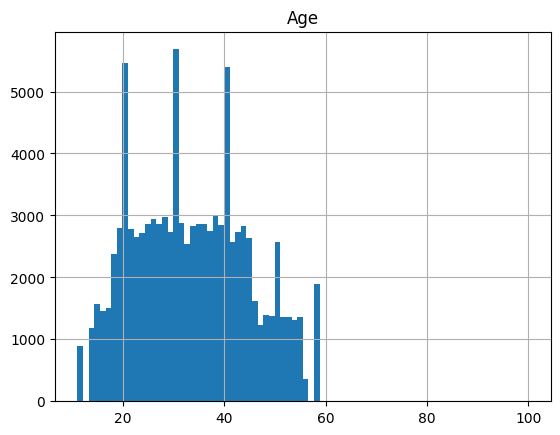

In [1366]:
df.loc[df["Age"] > 100, "Age"] = 58
df.loc[df["Age"] < 0, "Age"] = 11
print(df["Age"].min(), df["Age"].max())
df.hist(column="Age", bins=80)

In [1367]:
df["Occupation"] = df["Occupation"].str.replace("_", " ")
df = df.replace(r"^\s*$", np.nan, regex=True)

In [1368]:
df.sample(10)

,Month,Age,Occupation,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
23624,January,58,Accountant,20712.24,3,3,30,7,"Student Loan, Mortgage Loan, Home Equity Loan,...",7,11,8.43,6.0,_,2375.83,23.667133,NaN,Yes,84.777883,72.30045063998962,!@9#%8,333.62366654248177,Poor
93984,January,38,Engineer,16604.27,5,755,14,3,"Debt Consolidation Loan, Not Specified, and Mo...",8,7,21.56,8.0,Standard,888.66,37.638411,13 Years and 5 Months,Yes,27.589593,53.28286212280892,High_spent_Small_value_payments,295.39646111068583,Standard
7350,July,32,Accountant,26217.46,8,3,18,2,"Student Loan, and Debt Consolidation Loan",9,16,8.81,4.0,Standard,1135.43,31.079244,27 Years and 3 Months,Yes,27.045547,81.98283734579533,!@9#%8,334.05044857498774,Standard
62842,March,43,Developer,39135.0_,6,10,20,6,"Payday Loan, Student Loan, Not Specified, Auto...",18,26,3.34,10.0,Bad,1265.94,40.747939,7 Years and 4 Months,Yes,145.541981,112.79215900243678,High_spent_Medium_value_payments,295.2908600638432,Poor
24407,August,17,Journalist,8264.75,7,10,26,5_,"Credit-Builder Loan, Home Equity Loan, Student...",43,18,1.35,11.0,_,2534.19,30.067962,15 Years and 2 Months,Yes,27.458547,32.991787237156174,Low_spent_Small_value_payments,289.1225825247912,Poor
48023,August,37,Mechanic,84215.13,5,5,6,5,"Personal Loan, Debt Consolidation Loan, Not Sp...",22,10,14.55,6.0,Standard,150.68,30.195816,5 Years and 8 Months,Yes,191.742071,859.734532972173,Low_spent_Small_value_payments,NaN,Standard
71071,August,20,Writer,19358.37,7,10,15,5,"Mortgage Loan, Debt Consolidation Loan, Debt C...",27,21,8.41,13.0,_,1486.17,24.743805,8 Years and 5 Months,Yes,50.985433,76.00337595291919,High_spent_Small_value_payments,298.8309413457682,Poor
76320,January,36,Developer,37475.07,3,4,7,0,NaN,12,7,9.77,2.0,Good,437.45,29.836660,23 Years and 7 Months,No,0.000000,195.09263652180687,High_spent_Small_value_payments,372.2996134781931,Good
14497,February,27,Accountant,17417.6,9,10,25,9_,"Payday Loan, Auto Loan, Debt Consolidation Loa...",30,22,26.92,12.0,Bad,4837.96,33.115098,5 Years and 10 Months,Yes,69.936844,82.01469606554298,Low_spent_Small_value_payments,291.49512675506196,Standard
6509,June,15,Journalist,46243.56,4,5,13,0,NaN,5,14,15.79,876.0,_,1455.34,27.144361,29 Years and 10 Months,Yes,0.000000,221.3549432032663,!@9#%8,477.0080567967337,Standard


In [1369]:
columns_to_turn_numeric = [
    "Num_of_Loan",
    "Annual_Income",
    "Num_of_Delayed_Payment",
    "Changed_Credit_Limit",
    "Outstanding_Debt",
    "Amount_invested_monthly",
    "Monthly_Balance",
]
df2 = df.copy()
for col in columns_to_turn_numeric:
    df[col] = df[col].str.replace("_", "", regex=False)
    df[col] = pd.to_numeric(df[col], errors="coerce")
"""coerced_rows_index = df[df['Outstanding_Debt'].isnull()].index


original_problematic_rows = df2.loc[coerced_rows_index]
original_problematic_rows"""

"coerced_rows_index = df[df['Outstanding_Debt'].isnull()].index\n\n\noriginal_problematic_rows = df2.loc[coerced_rows_index]\noriginal_problematic_rows"

In [1370]:
df["Credit_Score"].unique()

array(['Good', 'Standard', 'Poor'], dtype=object)

In [1371]:
columns_to_remove_underscores = ["Credit_Mix"]
for col in columns_to_remove_underscores:
    df[col] = df[col].str.strip().str.replace("_", "", regex=False)
    df[col] = df[col].replace("", np.nan)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 23 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Month                     100000 non-null  object 
 1   Age                       100000 non-null  int64  
 2   Occupation                92938 non-null   object 
 3   Annual_Income             100000 non-null  float64
 4   Num_Bank_Accounts         100000 non-null  int64  
 5   Num_Credit_Card           100000 non-null  int64  
 6   Interest_Rate             100000 non-null  int64  
 7   Num_of_Loan               100000 non-null  int64  
 8   Type_of_Loan              88592 non-null   object 
 9   Delay_from_due_date       100000 non-null  int64  
 10  Num_of_Delayed_Payment    92998 non-null   float64
 11  Changed_Credit_Limit      97909 non-null   float64
 12  Num_Credit_Inquiries      98035 non-null   float64
 13  Credit_Mix                79805 non-null   ob

In [1372]:
df["Num_of_Loan"] = df["Num_of_Loan"].replace(-100, np.nan)
df.sample(10)

,Month,Age,Occupation,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
81621,June,26,Teacher,62855.320,10,5,31,9.0,"Personal Loan, Home Equity Loan, Student Loan,...",61,21.0,7.34,10.0,NaN,1320.27,28.578012,6 Years and 1 Months,Yes,396.689817,10000.000000,Low_spent_Medium_value_payments,58.945488,Poor
47871,August,45,Developer,8071.240,7,5,21,9.0,"Auto Loan, Credit-Builder Loan, Debt Consolida...",54,24.0,7.86,12.0,NaN,1311.23,34.498833,13 Years and 2 Months,Yes,45.681562,23.894149,Low_spent_Small_value_payments,269.784622,Poor
93720,January,28,Lawyer,60061.640,10,9,24,6.0,"Auto Loan, Credit-Builder Loan, Debt Consolida...",16,20.0,27.91,9.0,Bad,4771.20,34.413228,5 Years and 9 Months,Yes,169.286269,303.585470,Low_spent_Small_value_payments,289.041927,Standard
67341,June,51,Media Manager,110437.200,4,7,17,4.0,"Student Loan, Home Equity Loan, Credit-Builder...",16,8.0,26.98,0.0,Standard,1480.53,29.854185,18 Years and 4 Months,Yes,235.561079,257.850403,High_spent_Medium_value_payments,696.698517,Standard
30144,January,55,Entrepreneur,29490.490,2,4,6,4.0,"Debt Consolidation Loan, Payday Loan, Payday L...",7,6.0,8.41,2.0,Good,591.33,24.893482,30 Years and 11 Months,No,90.930735,294.282411,Low_spent_Small_value_payments,129.340937,Standard
86583,August,23,NaN,41797.940,1,191,3,3.0,"Not Specified, Payday Loan, and Payday Loan",4,2.0,5.36,9.0,Good,1253.67,25.491009,30 Years and 9 Months,No,73.430451,217.661589,Low_spent_Small_value_payments,360.724126,Good
76779,April,24,Teacher,16311.665,5,6,6,4.0,"Auto Loan, Mortgage Loan, Credit-Builder Loan,...",12,14.0,8.90,3.0,Standard,598.76,30.710569,19 Years and 2 Months,No,35.266580,114.032507,Low_spent_Small_value_payments,259.131455,Standard
22772,May,27,Media Manager,42277.830,8,4,14,2.0,"Debt Consolidation Loan, and Debt Consolidatio...",8,7.0,12.59,6.0,Standard,1469.21,30.762853,20 Years and 3 Months,Yes,59.411604,230.627055,Low_spent_Large_value_payments,352.376591,Standard
43624,January,34,Writer,40032.160,5,5,3,NaN,"Personal Loan, and Auto Loan",15,8.0,5.08,NaN,NaN,1058.13,33.810216,21 Years and 4 Months,No,64.387219,110.745831,High_spent_Medium_value_payments,421.368283,Good
37278,July,29,Media Manager,25810.930,5,3,14,3.0,"Not Specified, Auto Loan, and Credit-Builder Loan",13,18.0,10.53,5.0,Standard,1123.51,38.711989,17 Years and 4 Months,Yes,51.424951,88.947468,Low_spent_Large_value_payments,321.318665,Good


In [1373]:
columns = [
    "Amount_invested_monthly",
    "Num_of_Loan",
    "Num_of_Delayed_Payment",
    "Changed_Credit_Limit",
    "Num_Credit_Inquiries",
    "Monthly_Balance",
]
for col in columns:
    print((df[col] == 0).sum())

169
10930
1609
4
6972
0


In [1374]:
columns = [
    "Amount_invested_monthly",
    "Num_of_Loan",
    "Num_of_Delayed_Payment",
    "Changed_Credit_Limit",
    "Num_Credit_Inquiries",
    "Monthly_Balance",
]

for col in columns:
    # Create missing flag
    df[col + "_missing"] = df[col].isnull().astype(int)

    # Fill with median (ignores NaN automatically)
    df[col] = df[col].fillna(df[col].median())
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 29 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   Month                            100000 non-null  object 
 1   Age                              100000 non-null  int64  
 2   Occupation                       92938 non-null   object 
 3   Annual_Income                    100000 non-null  float64
 4   Num_Bank_Accounts                100000 non-null  int64  
 5   Num_Credit_Card                  100000 non-null  int64  
 6   Interest_Rate                    100000 non-null  int64  
 7   Num_of_Loan                      100000 non-null  float64
 8   Type_of_Loan                     88592 non-null   object 
 9   Delay_from_due_date              100000 non-null  int64  
 10  Num_of_Delayed_Payment           100000 non-null  float64
 11  Changed_Credit_Limit             100000 non-null  float64
 12  Num

In [1375]:
df[["Type_of_Loan", "Credit_History_Age", "Payment_Behaviour"]].sample(10)

,Type_of_Loan,Credit_History_Age,Payment_Behaviour
67722,"Credit-Builder Loan, Home Equity Loan, Auto Lo...",8 Years and 10 Months,Low_spent_Small_value_payments
23184,NaN,23 Years and 1 Months,Low_spent_Large_value_payments
20582,"Credit-Builder Loan, and Home Equity Loan",29 Years and 2 Months,High_spent_Small_value_payments
33622,"Home Equity Loan, and Student Loan",9 Years and 11 Months,Low_spent_Small_value_payments
11719,"Not Specified, Credit-Builder Loan, Mortgage L...",NaN,High_spent_Medium_value_payments
21292,"Auto Loan, Student Loan, Payday Loan, Payday L...",NaN,Low_spent_Small_value_payments
57108,"Home Equity Loan, and Payday Loan",31 Years and 2 Months,High_spent_Large_value_payments
32367,NaN,19 Years and 4 Months,High_spent_Medium_value_payments
28848,"Mortgage Loan, and Personal Loan",28 Years and 10 Months,High_spent_Large_value_payments
147,NaN,27 Years and 5 Months,Low_spent_Medium_value_payments


In [1376]:
df["Type_of_Loan"] = df["Type_of_Loan"].fillna("")
df["Type_of_Loan"] = df["Type_of_Loan"].str.replace(" and ", ",", regex=False)
df["Type_of_Loan"] = df["Type_of_Loan"].apply(
    lambda x: ",".join([s.strip() for s in x.split(",") if s.strip()])
)

loan_dummies = df["Type_of_Loan"].str.get_dummies(sep=",")

loan_dummies.columns = loan_dummies.columns.str.strip()

df = pd.concat([df, loan_dummies], axis=1)
df = df.drop(columns=["Type_of_Loan"], axis=1)
df.sample(5)

,Month,Age,Occupation,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Amount_invested_monthly_missing,Num_of_Loan_missing,Num_of_Delayed_Payment_missing,Changed_Credit_Limit_missing,Num_Credit_Inquiries_missing,Monthly_Balance_missing,Auto Loan,Credit-Builder Loan,Debt Consolidation Loan,Home Equity Loan,Mortgage Loan,Not Specified,Payday Loan,Personal Loan,Student Loan
77160,January,38,Developer,35435.81,3,1,10,4.0,9,12.0,4.50,1.0,Good,1457.03,37.180113,19 Years and 9 Months,No,101.982324,161.649695,!@9#%8,331.666398,Good,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0
69912,January,34,Writer,17346.16,8,9,25,5.0,54,10.0,17.45,6.0,Standard,2528.51,34.335448,NaN,NM,58.231466,211.577217,Low_spent_Small_value_payments,180.942650,Poor,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0
77874,March,40,Engineer,71297.02,3,4,4,4.0,5,4.0,16.50,2.0,Good,383.01,30.497824,30 Years and 9 Months,No,168.120926,149.557440,High_spent_Large_value_payments,525.163468,Good,0,0,0,0,0,0,1,1,1,0,0,0,1,0,0
99941,June,47,Developer,22620.79,7,3,9,0.0,27,18.0,5.31,2.0,Standard,642.46,27.699504,NaN,No,0.000000,207.473456,Low_spent_Small_value_payments,254.733128,Poor,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
31732,May,22,Lawyer,28910.14,8,6,11,4.0,7,14.0,7.67,3.0,Standard,496.03,40.448036,22 Years and 2 Months,No,75.124270,105.698271,Low_spent_Small_value_payments,353.295293,Poor,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0


In [1377]:
df["Credit_History_Age"] = df["Credit_History_Age"].fillna("0 Years and 0 Months")

df["Credit_History_Years"] = (
    df["Credit_History_Age"].str.extract(r"(\d+)\s+Years").astype(int)
)
df["Credit_History_Months"] = (
    df["Credit_History_Age"].str.extract(r"(\d+)\s+Months").astype(int)
)

df["Credit_History_TotalMonths"] = (
    df["Credit_History_Years"] * 12 + df["Credit_History_Months"]
)
df = df.drop(
    columns=["Credit_History_Age", "Credit_History_Years", "Credit_History_Months"],
    axis=1,
)

In [1378]:
df["Payment_Behaviour"] = df["Payment_Behaviour"].replace("!@9#%8", np.nan)

tokens = df["Payment_Behaviour"].str.split("_")

df["Spending"] = tokens.str[0]
df["Payment_Value"] = tokens.str[2]

mapping_spending = {"Low": 0, "High": 1}
mapping_payment = {"Small": 0, "Medium": 1, "Large": 2}

df["Spending"] = df["Spending"].map(mapping_spending)
df["Payment_Value"] = df["Payment_Value"].map(mapping_payment)

df["Spending"] = df["Spending"].fillna(-1)
df["Payment_Value"] = df["Payment_Value"].fillna(-1)

df["Spending_missing"] = df["Spending"].isna().astype(int)
df["Payment_Value_missing"] = df["Payment_Value"].isna().astype(int)

df = df.drop(columns=["Payment_Behaviour"], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 40 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   Month                            100000 non-null  object 
 1   Age                              100000 non-null  int64  
 2   Occupation                       92938 non-null   object 
 3   Annual_Income                    100000 non-null  float64
 4   Num_Bank_Accounts                100000 non-null  int64  
 5   Num_Credit_Card                  100000 non-null  int64  
 6   Interest_Rate                    100000 non-null  int64  
 7   Num_of_Loan                      100000 non-null  float64
 8   Delay_from_due_date              100000 non-null  int64  
 9   Num_of_Delayed_Payment           100000 non-null  float64
 10  Changed_Credit_Limit             100000 non-null  float64
 11  Num_Credit_Inquiries             100000 non-null  float64
 12  Cre

In [1379]:
month_map = {
    "January": 1,
    "February": 2,
    "March": 3,
    "April": 4,
    "May": 5,
    "June": 6,
    "July": 7,
    "August": 8,
    "September": 9,
    "October": 10,
    "November": 11,
    "December": 12,
}

df["Month_Num"] = df["Month"].map(month_map)
df["Month_sin"] = np.sin(2 * np.pi * df["Month_Num"] / 12)
df["Month_cos"] = np.cos(2 * np.pi * df["Month_Num"] / 12)
df = df.drop(columns=["Month", "Month_Num"], axis=1)

In [1380]:
dummies_list = ["Occupation", "Credit_Mix", "Payment_of_Min_Amount"]
for col in dummies_list:
    dummies = pd.get_dummies(df[col], prefix=col, dtype=int)
    df = pd.concat([df, dummies], axis=1)
df = df.drop(columns=dummies_list, axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 59 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   Age                              100000 non-null  int64  
 1   Annual_Income                    100000 non-null  float64
 2   Num_Bank_Accounts                100000 non-null  int64  
 3   Num_Credit_Card                  100000 non-null  int64  
 4   Interest_Rate                    100000 non-null  int64  
 5   Num_of_Loan                      100000 non-null  float64
 6   Delay_from_due_date              100000 non-null  int64  
 7   Num_of_Delayed_Payment           100000 non-null  float64
 8   Changed_Credit_Limit             100000 non-null  float64
 9   Num_Credit_Inquiries             100000 non-null  float64
 10  Outstanding_Debt                 100000 non-null  float64
 11  Credit_Utilization_Ratio         100000 non-null  float64
 12  Tot

In [1381]:
mapping = {"Poor": 0, "Standard": 1, "Good": 2}

df["Credit_Score"] = df["Credit_Score"].map(mapping)

In [1382]:
df.sample(10)

,Age,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score,Amount_invested_monthly_missing,Num_of_Loan_missing,Num_of_Delayed_Payment_missing,Changed_Credit_Limit_missing,Num_Credit_Inquiries_missing,Monthly_Balance_missing,Auto Loan,Credit-Builder Loan,Debt Consolidation Loan,Home Equity Loan,Mortgage Loan,Not Specified,Payday Loan,Personal Loan,Student Loan,Credit_History_TotalMonths,Spending,Payment_Value,Spending_missing,Payment_Value_missing,Month_sin,Month_cos,Occupation_Accountant,Occupation_Architect,Occupation_Developer,Occupation_Doctor,Occupation_Engineer,Occupation_Entrepreneur,Occupation_Journalist,Occupation_Lawyer,Occupation_Manager,Occupation_Mechanic,Occupation_Media Manager,Occupation_Musician,Occupation_Scientist,Occupation_Teacher,Occupation_Writer,Credit_Mix_Bad,Credit_Mix_Good,Credit_Mix_Standard,Payment_of_Min_Amount_NM,Payment_of_Min_Amount_No,Payment_of_Min_Amount_Yes
16869,48,35730.440,5,6,3,4.0,11,16.0,1.65,4.0,1185.95,35.153556,74.469256,85.148799,383.835612,2,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,262,1.0,1.0,0,0,1.224647e-16,-1.000000,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
95643,25,32090.480,7,5,25,7.0,29,8.0,10.39,6.0,1266.79,31.081153,169.327870,165.016249,226.876548,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,109,0.0,0.0,0,0,8.660254e-01,-0.500000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
19463,44,63354.360,6,6,10,3.0,21,16.0,12.20,7.0,895.41,29.096685,27.553920,272.557987,512.041093,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,208,0.0,2.0,0,0,-8.660254e-01,-0.500000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
14532,35,89722.400,2,5,5,2.0,2,7.0,2.47,7.0,1071.85,31.887538,101.942338,323.221819,599.522509,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,198,1.0,0.0,0,0,5.000000e-01,-0.866025,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
3500,22,82840.240,1,6,1,1.0,6,2.0,1.81,1.0,360.92,35.238947,56.691938,184.519617,736.123778,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,225,0.0,1.0,0,0,5.000000e-01,-0.866025,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0
45696,52,68763.140,5,2,1,2.0,3,3.0,3.72,2.0,1304.38,27.278598,73539.000000,488.300270,260.778935,2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,281,0.0,2.0,0,0,5.000000e-01,0.866025,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
74147,35,38631.060,5,3,9,0.0,27,18.0,11.75,4.0,1168.71,31.241832,0.000000,253.807399,340.818101,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,223,0.0,0.0,0,0,8.660254e-01,-0.500000,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0
54859,58,62458.770,8,6,20,4.0,12,14.0,23.02,7.0,1215.52,34.808829,199.046256,415.409699,198.233795,2,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,236,0.0,2.0,0,0,8.660254e-01,-0.500000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
84156,33,16743.345,2,4,5,0.0,10,1.0,4.21,3.0,1272.03,33.353290,97.912080,173.775408,245.452467,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,319,0.0,0.0,0,0,5.000000e-01,-0.866025,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
34097,26,19798.930,6,8,17,4.0,15,23.0,3.91,12.0,1250.46,28.233040,61.253355,63.836390,292.901338,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,65,1.0,0.0,0,0,8.660254e-01,0.500000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1


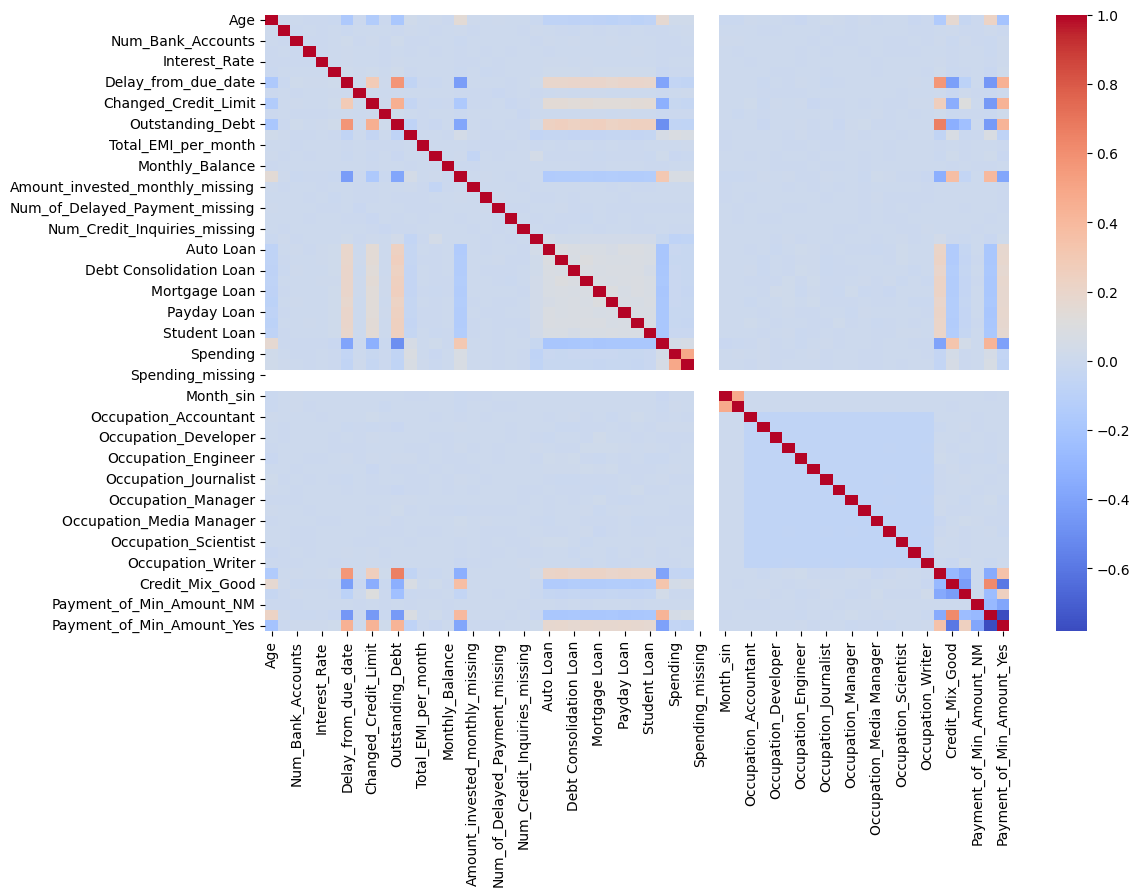

Top 10 Positive Predictors (Features that improve Credit Score):
Payment_of_Min_Amount_No      0.398371
Credit_Mix_Good               0.370462
Credit_History_TotalMonths    0.308742
Age                           0.147880
Spending                      0.073470
Payment_Value                 0.073459
Credit_Utilization_Ratio      0.045793
Occupation_Media Manager      0.012997
Amount_invested_monthly       0.011377
Annual_Income                 0.008015
Name: Credit_Score, dtype: float64

Top 10 Negative Predictors (Features that worsen Credit Score):
Payday Loan                 -0.142031
Personal Loan               -0.142827
Auto Loan                   -0.151172
Changed_Credit_Limit        -0.167634
Credit_Mix_Bad              -0.339889
Payment_of_Min_Amount_Yes   -0.384088
Outstanding_Debt            -0.386525
Delay_from_due_date         -0.431591
Spending_missing                  NaN
Payment_Value_missing             NaN
Name: Credit_Score, dtype: float64


In [1383]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), cmap="coolwarm")
plt.show()
correlations = df.corr()["Credit_Score"].sort_values(ascending=False)

correlations = correlations.drop("Credit_Score")

print("Top 10 Positive Predictors (Features that improve Credit Score):")
print(correlations.head(10))

print("\nTop 10 Negative Predictors (Features that worsen Credit Score):")
print(correlations.tail(10))

In [1384]:
df_eng = df.copy()

df_eng["Debt_to_Income"] = df_eng["Outstanding_Debt"] / (df_eng["Annual_Income"]+ 1e-5)
df_eng["Loan_per_Account"] = df_eng["Num_of_Loan"] / (
    df_eng["Num_Bank_Accounts"] + 1e-5
)
df_eng["Utilization_Interest"] = (
    df_eng["Credit_Utilization_Ratio"] * df_eng["Interest_Rate"]
)
df_eng["EMI_to_Income"] = df_eng["Total_EMI_per_month"] / (
    df_eng["Annual_Income"] / 12 + 1e-5
)
df_eng["Balance_to_Income"] = df_eng["Monthly_Balance"] / (
    df_eng["Annual_Income"] + 1e-5
)
df_eng["Delinquency_Ratio"] = df_eng["Num_of_Delayed_Payment"] / (
    df_eng["Num_of_Loan"]+ 1e-5
)

'''df_eng = df_eng.drop(
    columns=[
        "Outstanding_Debt",
        "Annual_Income",
        "Num_of_Loan",
        "Num_Bank_Accounts",
        "Credit_Utilization_Ratio",
        "Interest_Rate",
        "Total_EMI_per_month",
        "Monthly_Balance",
        "Num_of_Delayed_Payment",
    ]
)'''

'df_eng = df_eng.drop(\n    columns=[\n        "Outstanding_Debt",\n        "Annual_Income",\n        "Num_of_Loan",\n        "Num_Bank_Accounts",\n        "Credit_Utilization_Ratio",\n        "Interest_Rate",\n        "Total_EMI_per_month",\n        "Monthly_Balance",\n        "Num_of_Delayed_Payment",\n    ]\n)'

In [1385]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

X = df.drop(columns=["Credit_Score"])
y = df["Credit_Score"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [1386]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
    "XGBoost": xgb.XGBClassifier(
        n_estimators=300,
        learning_rate=0.1,
        max_depth=6,
        random_state=42,
        subsample=0.8,
        colsample_bytree=0.8,
        eval_metric="mlogloss",
    )
}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    print(f"\n🔹 {name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))


🔹 Logistic Regression
Accuracy: 0.6181
              precision    recall  f1-score   support

           0       0.62      0.44      0.52      5799
           1       0.65      0.73      0.68     10635
           2       0.52      0.59      0.56      3566

    accuracy                           0.62     20000
   macro avg       0.60      0.58      0.58     20000
weighted avg       0.62      0.62      0.61     20000


🔹 Random Forest
Accuracy: 0.79745
              precision    recall  f1-score   support

           0       0.80      0.80      0.80      5799
           1       0.82      0.82      0.82     10635
           2       0.75      0.73      0.74      3566

    accuracy                           0.80     20000
   macro avg       0.79      0.78      0.78     20000
weighted avg       0.80      0.80      0.80     20000


🔹 XGBoost
Accuracy: 0.76555
              precision    recall  f1-score   support

           0       0.77      0.74      0.75      5799
           1       0.79  

In [1387]:
X_eng = df_eng.drop(columns=["Credit_Score"])
y_eng = df_eng["Credit_Score"]

X_train, X_test, y_train, y_test = train_test_split(
    X_eng, y_eng, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    print(f"\n🔹 {name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))


🔹 Logistic Regression
Accuracy: 0.6181
              precision    recall  f1-score   support

           0       0.63      0.44      0.52      5799
           1       0.65      0.73      0.68     10635
           2       0.52      0.59      0.55      3566

    accuracy                           0.62     20000
   macro avg       0.60      0.58      0.58     20000
weighted avg       0.62      0.62      0.61     20000


🔹 Random Forest
Accuracy: 0.80235
              precision    recall  f1-score   support

           0       0.80      0.81      0.81      5799
           1       0.82      0.82      0.82     10635
           2       0.76      0.73      0.74      3566

    accuracy                           0.80     20000
   macro avg       0.79      0.79      0.79     20000
weighted avg       0.80      0.80      0.80     20000


🔹 XGBoost
Accuracy: 0.7678
              precision    recall  f1-score   support

           0       0.77      0.74      0.76      5799
           1       0.79   